In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
def dyn_SIS(g,seed,maxTime,beta,mu): # g=graph, seed=actual node wher you start, maxTime=end of simulation, beta=transmittion rate (time plays role), mu=recovery rate
    
    susceptible = 0
    infected = 1
    recovered =""  # new need this for SIR -> not sure as the nodes need to be removed
    
    for i in g.nodes():
        g.nodes[i]['state'] = susceptible # make all susceptible
    g.nodes[seed]['state'] = infected  # choose node that is infected
    
    for t in np.arange(maxTime): # loop over time 0-100

        for i in g.nodes():
            if g.nodes[i]['state'] == infected: # check if infected
                for j in g.neighbors(i):
                    if g.nodes[j]['state'] == susceptible:
                        if np.random.rand() < beta: # take random number and if smaller as beta you infect
                            g.nodes[j]['state'] = infected
                if np.random.rand() < mu: # this must be changed to recovered!!! somehow remove nodes
                    g.nodes[i]['state'] = susceptible
                    
    inf_list = np.where([g.nodes[i]['state']==infected for i in g.nodes()])[0] # define list of infected nodes
    sus_list = np.where([g.nodes[i]['state']==susceptible for i in g.nodes()])[0]
    rec_list = np.where([g.nodes[i]['state']==recovered for i in g.nodes()])[0] # new
    
    return inf_list,sus_list

In [4]:
# need to calc the len removed nodes (bc of recovered) 

In [5]:
N=100
G = nx.barabasi_albert_graph(N,1)

In [6]:
rangebeta = np.arange(0,1,0.1)
rangebeta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [7]:
mu=1.0

In [8]:
G.degree()

DegreeView({0: 2, 1: 27, 2: 5, 3: 4, 4: 2, 5: 1, 6: 3, 7: 5, 8: 4, 9: 10, 10: 3, 11: 1, 12: 4, 13: 4, 14: 2, 15: 1, 16: 2, 17: 1, 18: 1, 19: 1, 20: 2, 21: 8, 22: 2, 23: 2, 24: 4, 25: 1, 26: 2, 27: 2, 28: 1, 29: 1, 30: 1, 31: 2, 32: 2, 33: 3, 34: 1, 35: 1, 36: 2, 37: 1, 38: 2, 39: 1, 40: 1, 41: 2, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 2, 49: 2, 50: 1, 51: 1, 52: 1, 53: 2, 54: 1, 55: 5, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 3, 66: 1, 67: 1, 68: 1, 69: 2, 70: 1, 71: 2, 72: 1, 73: 1, 74: 1, 75: 1, 76: 2, 77: 2, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1})

In [9]:
rho = []
for bb in rangebeta:
    il,sl = dyn_SIS(G,0,100,bb,mu)
    rho.append(float((len(il))/N))
    

In [10]:
rho

[0.0, 0.0, 0.0, 0.0, 0.04, 0.0, 0.14, 0.25, 0.28, 0.28]

In [2]:
x = [1, 2, 3 ,4, 5]
y = [2, 4 ,6 , 8, 10]

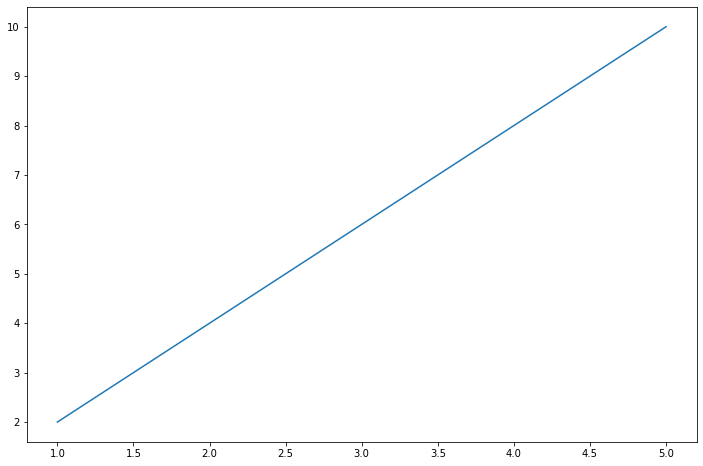

In [3]:
plt.figure(figsize=(12,8))
plt.plot(x, y)